In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
 
data=pd.read_csv('/home/vagrant/wine/WineData.csv')
wines=pd.DataFrame(data,columns=['Timestamp', 'Country', 'Region', 'PDO', 'Varietal', 'Type of wine', 'Still or Sparkling', 'Intensity Color', 'Color', 'Intensity Nose', 'Sweetness', 'Acidity', 'Tannin', 'Alcohol', 'Body', 'Flavor Intensity', 'Finish', 'Floral', 'Green Fruit', 'Citrus Fruit', 'Stone Fruit', 'Tropical Fruit', 'Red Fruit', 'Black Fruit', 'Dried/cooked fruit', 'Herbaceous', 'Herbal', 'Pungent spice', 'Other', 'Yeast/lees', 'MLF', 'Oak', 'Developing notes', 'Color.number'])
wines.rename(columns={'Timestamp': 'Year'}, inplace=True)
wines['Varietal'][4]='Tempranillo'
wines['My Rating']=[4,2,1,3,3,1,4,4,4,4,1,1,2,3,3,3,3,4,2,1,4,3,4,2,3,3,3,3,4,4,3,4,4,3,4,4,3,2,3,2,4,1,4,2,4,4,4,3,3,4,3,3,3,3,3,3,4,4,3,3,4,4,4,3,3,3,3,1,1,1,1,1,2,2,3,3,3,4,3,3,3,2,4,3,4]
wines.drop(wines.index[58],inplace=True)
wines['Tannin']=wines['Tannin'].fillna(0)
wines['White, Rose, Red'] = wines['Type of wine']
wines['White, Rose, Red'] = wines['White, Rose, Red'].replace(['White','Rose','Red'],[1,2,3])
wines['Still or Sparkling'].unique()
wines['Still, Sparkling, Fortified']= wines['Still or Sparkling'].replace(['Still','Sparkling','Fortified'],[1,2,3])
wines

/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Year,Country,Region,PDO,Varietal,Type of wine,Still or Sparkling,Intensity Color,Color,Intensity Nose,...,Pungent spice,Other,Yeast/lees,MLF,Oak,Developing notes,Color.number,My Rating,"White, Rose, Red","Still, Sparkling, Fortified"
0,2015,France,Loire,Muscadet Sevre et Maine Sur Lie,Melon de Bourgogne,White,Still,2,Gold,3,...,0,0,0,0,0,0,3,4,1,1
1,2015,USA,New York,Finger Lakes,Riesling,White,Still,2,Lemon,4,...,0,0,0,0,0,0,2,2,1,1
2,2013,USA,California,Sonoma Coast,Chardonnay,White,Still,2,Gold,5,...,0,0,0,1,1,0,3,1,1,1
3,2013,Italy,Tuscany,Toscana IGT,"Sangiovese, Merlot, Cabernet Sauvignon",Red,Still,3,Ruby,3,...,1,0,0,0,0,0,9,3,3,1
4,2004,Spain,Rioja,Rioja Gran Reserva DOCa,Tempranillo,Red,Still,3,Garnet,4,...,1,0,0,0,1,1,10,3,3,1
5,NV,Spain,Jerez,Jerez,Pedro Ximenez,White,Fortified,3,Brown,5,...,0,0,0,0,1,1,5,1,1,3
6,2015,Italy,Alto Adige,Alto Adige DOC,Pinot Grigio,White,Still,1,Lemon,3,...,0,0,0,0,0,0,2,4,1,1
7,2013,France,Alsace,Alsace,Pinot Gris,White,Still,2,Gold,4,...,0,0,0,0,0,0,3,4,1,1
8,2015,France,Loire,Sancerre,Sauvignon Blanc,White,Still,2,Gold,4,...,0,0,0,0,0,0,3,4,1,1
9,2015,New Zealand,Marlborough,Marlborough,Sauvignon Blanc,White,Still,1,Lemon,4,...,1,0,0,0,0,0,2,4,1,1


In [2]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144


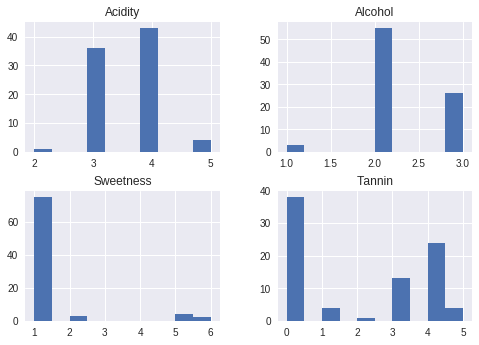

In [3]:
wines_hist = wines[['Acidity','Alcohol','Sweetness','Tannin']].hist()

In [4]:
red_still_wines=wines[(wines['Type of wine']=="Red") & (wines['Still or Sparkling']=="Still")]
red_still_wines_factors=red_still_wines.loc[:,('Sweetness', 'Acidity', 'Tannin', 'Alcohol', 'Body', 'Flavor Intensity', 'Finish', 'Floral', 'Green Fruit', 'Citrus Fruit', 'Stone Fruit', 'Tropical Fruit', 'Red Fruit', 'Black Fruit', 'Dried/cooked fruit', 'Herbaceous', 'Herbal', 'Pungent spice', 'Other', 'Yeast/lees', 'MLF', 'Oak', 'Developing notes')]
print list(wines)

['Year', 'Country', 'Region', 'PDO', 'Varietal', 'Type of wine', 'Still or Sparkling', 'Intensity Color', 'Color', 'Intensity Nose', 'Sweetness', 'Acidity', 'Tannin', 'Alcohol', 'Body', 'Flavor Intensity', 'Finish', 'Floral', 'Green Fruit', 'Citrus Fruit', 'Stone Fruit', 'Tropical Fruit', 'Red Fruit', 'Black Fruit', 'Dried/cooked fruit', 'Herbaceous', 'Herbal', 'Pungent spice', 'Other', 'Yeast/lees', 'MLF', 'Oak', 'Developing notes', 'Color.number', 'My Rating', 'White, Rose, Red', 'Still, Sparkling, Fortified']


In [5]:
sweetness_weight = 3
acidity_weight = 3
tannin_weight = 3
alcohol_weight = 2
oak_weight = 2

In [6]:
red_still_wines_factors['Sweetness'] = red_still_wines_factors['Sweetness']*sweetness_weight
red_still_wines_factors['Acidity'] = red_still_wines_factors['Acidity']*acidity_weight
red_still_wines_factors['Tannin'] = red_still_wines_factors['Tannin']*tannin_weight
red_still_wines_factors['Alcohol'] = red_still_wines_factors['Alcohol']*alcohol_weight
red_still_wines_factors['Oak'] = red_still_wines_factors['Oak']*oak_weight



In [7]:
kmeans = KMeans(n_clusters=5, random_state=35).fit(red_still_wines_factors)
center=pd.DataFrame(kmeans.cluster_centers_)
red_still_wines['Red Cluster'] = kmeans.labels_
red_wine_centers = center.round()
print red_wine_centers

    0     1     2    3    4    5    6    7    8    9  ...    13   14   15  \
0  3.0  12.0  13.0  5.0  4.0  4.0  4.0  0.0  0.0  0.0 ...   1.0  0.0  0.0   
1  3.0   9.0  12.0  4.0  4.0  4.0  4.0  0.0  0.0  0.0 ...   1.0  1.0  1.0   
2  3.0   9.0  12.0  6.0  5.0  5.0  5.0  0.0  0.0  0.0 ...   1.0  0.0  1.0   
3  3.0   9.0   9.0  4.0  3.0  3.0  3.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
4  3.0  12.0   8.0  4.0  4.0  4.0  4.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   

    16   17   18   19   20   21   22  
0  1.0  1.0  0.0  0.0  0.0  2.0  0.0  
1  0.0  1.0  0.0  0.0  0.0  2.0  0.0  
2  1.0  0.0  0.0  0.0  0.0  2.0  0.0  
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[5 rows x 23 columns]


/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
red_still_wines[['Red Cluster','PDO','Varietal']].sort_values(['Red Cluster'])

,Red Cluster,PDO,Varietal
65,0,Jumilla,Monastrell
76,0,Barossa,Shiraz
32,0,"Nuits St. Georges 1er Cru ""Aux Boudots""",Pinot Noir
63,0,Priorat,"Garnacha, Mazuelo"
64,0,Rioja Reserva,Tempranillo
26,0,St. Emilion Grand Cru Classe,Merlot
62,0,Ribera del Duero,Tempranillo
66,0,Douro,"Touriga Nacional, Tinta Roriz, Touriga Franca"
35,0,Cote Rotie,Syrah
16,0,Barolo,Nebbiolo


In [9]:
dist = pdist(red_still_wines_factors, 'euclidean')
red_wines_dist = pd.DataFrame(squareform(dist))
red_wines_dist.columns = (red_still_wines['PDO']+" ("+red_still_wines['Varietal']+")"+" - "+ red_still_wines['Year'])
red_wines_dist.index = (red_still_wines['PDO']+" ("+red_still_wines['Varietal']+")")
nearest_red_wines = red_wines_dist.loc['Sonoma (Zinfandel)']
nearest_red_wines.sort_values()[1:6]

Napa Valley (Cabernet Sauvignon) - 2014                             2.000000
Stellenbosch (Cabernet Sauvignon, Cabernet Franc, Merlot) - 2014    2.236068
Alexander Valley (Zinfandel) - 2014                                 2.449490
Bandol (Mourvedre, Grenache) - 2011                                 2.449490
Corbieres (Carignan) - 2013                                         2.645751
Name: Sonoma (Zinfandel), dtype: float64

In [10]:
red_min = red_still_wines_factors.max()
red_max = red_still_wines_factors.min()
red_max_dist = pdist((red_min,red_max),'euclidean')
print red_max_dist

[ 10.90871211]


In [11]:
similar_red_wines = 100-(100*red_wines_dist.loc['Sonoma (Zinfandel)']/red_max_dist)
similar_red_wines_round = similar_red_wines.round()
similar_red_wines_round.sort_values(ascending = False)[1:6]

Napa Valley (Cabernet Sauvignon) - 2014                             82.0
Stellenbosch (Cabernet Sauvignon, Cabernet Franc, Merlot) - 2014    80.0
Bandol (Mourvedre, Grenache) - 2011                                 78.0
Alexander Valley (Zinfandel) - 2014                                 78.0
Corbieres (Carignan) - 2013                                         76.0
Name: Sonoma (Zinfandel), dtype: float64

In [12]:
white_still_wines=wines[(wines['Type of wine']=="White") & (wines['Still or Sparkling']=="Still")]
white_still_wines_factors=white_still_wines.loc[:,('Sweetness', 'Acidity', 'Alcohol', 'Body', 'Flavor Intensity', 'Finish', 'Floral', 'Green Fruit', 'Citrus Fruit', 'Stone Fruit', 'Tropical Fruit', 'Red Fruit', 'Black Fruit', 'Dried/cooked fruit', 'Herbaceous', 'Herbal', 'Pungent spice', 'Other', 'Yeast/lees', 'MLF', 'Oak', 'Developing notes')]

white_still_wines_factors['Sweetness'] = white_still_wines_factors['Sweetness']*sweetness_weight
white_still_wines_factors['Acidity'] = white_still_wines_factors['Acidity']*acidity_weight
white_still_wines_factors['Alcohol'] = white_still_wines_factors['Alcohol']*alcohol_weight
white_still_wines_factors['Oak'] = white_still_wines_factors['Oak']*oak_weight

white_kmeans = KMeans(n_clusters=4, random_state=35).fit(white_still_wines_factors)
white_center=pd.DataFrame(kmeans.cluster_centers_)
white_still_wines['White Cluster'] = white_kmeans.labels_
white_wine_centers = center.round()

white_dist = pdist(white_still_wines_factors, 'euclidean')
white_wines_dist = pd.DataFrame(squareform(white_dist))
white_wines_dist.columns = (white_still_wines['PDO']+" ("+white_still_wines['Varietal']+")"+" - "+ white_still_wines['Year'])
white_wines_dist.index = (white_still_wines['PDO']+" ("+white_still_wines['Varietal']+")")
nearest_white_wines = white_wines_dist.loc['Alsace (Pinot Gris)']
nearest_white_wines.sort_values()[1:6]

white_min = white_still_wines_factors.max()
white_max = white_still_wines_factors.min()
white_max_dist = pdist((white_min,white_max),'euclidean')
print white_max_dist

similar_white_wines = 100-(100*white_wines_dist.loc['Alsace (Pinot Gris)']/white_max_dist)
similar_white_wines_round = similar_white_wines.round()
similar_white_wines_round.sort_values(ascending = False)[1:6]


[ 16.85229955]


/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Muscadet Sevre et Maine Clisson (Melon de Bourgogne) - 2013    94.0
Sancerre (Sauvignon Blanc) - 2015                              88.0
Chablis (Chardonnay) - 2011                                    88.0
Marlborough (Sauvignon Blanc) - 2015                           88.0
Savennieres (Chenin Blanc) - 2014                              87.0
Name: Alsace (Pinot Gris), dtype: float64

In [13]:
white_still_wines[['White Cluster','PDO','Varietal']].sort_values(['White Cluster'])

,White Cluster,PDO,Varietal
37,0,Alsace,Gewurztraminer
1,0,Finger Lakes,Riesling
2,0,Sonoma Coast,Chardonnay
12,0,Soave Classico DOC,Garganega
18,0,South Australia,Chardonnay
19,0,Santa Barbara County,Chardonnay
43,0,Chassagne-Montrachet,Chardonnay
47,1,Sauternes 1er Cru,"Semillon, Sauvignon Blanc"
41,1,Tokaji-Aszu 5 Puttonyos,Aszu
46,2,Pessac-Leognan,"Sauvignon Blanc, Semillon"


In [14]:
wines

,Year,Country,Region,PDO,Varietal,Type of wine,Still or Sparkling,Intensity Color,Color,Intensity Nose,...,Pungent spice,Other,Yeast/lees,MLF,Oak,Developing notes,Color.number,My Rating,"White, Rose, Red","Still, Sparkling, Fortified"
0,2015,France,Loire,Muscadet Sevre et Maine Sur Lie,Melon de Bourgogne,White,Still,2,Gold,3,...,0,0,0,0,0,0,3,4,1,1
1,2015,USA,New York,Finger Lakes,Riesling,White,Still,2,Lemon,4,...,0,0,0,0,0,0,2,2,1,1
2,2013,USA,California,Sonoma Coast,Chardonnay,White,Still,2,Gold,5,...,0,0,0,1,1,0,3,1,1,1
3,2013,Italy,Tuscany,Toscana IGT,"Sangiovese, Merlot, Cabernet Sauvignon",Red,Still,3,Ruby,3,...,1,0,0,0,0,0,9,3,3,1
4,2004,Spain,Rioja,Rioja Gran Reserva DOCa,Tempranillo,Red,Still,3,Garnet,4,...,1,0,0,0,1,1,10,3,3,1
5,NV,Spain,Jerez,Jerez,Pedro Ximenez,White,Fortified,3,Brown,5,...,0,0,0,0,1,1,5,1,1,3
6,2015,Italy,Alto Adige,Alto Adige DOC,Pinot Grigio,White,Still,1,Lemon,3,...,0,0,0,0,0,0,2,4,1,1
7,2013,France,Alsace,Alsace,Pinot Gris,White,Still,2,Gold,4,...,0,0,0,0,0,0,3,4,1,1
8,2015,France,Loire,Sancerre,Sauvignon Blanc,White,Still,2,Gold,4,...,0,0,0,0,0,0,3,4,1,1
9,2015,New Zealand,Marlborough,Marlborough,Sauvignon Blanc,White,Still,1,Lemon,4,...,1,0,0,0,0,0,2,4,1,1


In [15]:
from bokeh.io import push_notebook, show, output_file,output_notebook,reset_output,save
from bokeh.plotting import figure

p = figure(title="Wines", plot_height=300, plot_width=600)
r = p.line(wines['Type of wine'],wines['Intensity Color'], color="#2222aa", line_width=3)


In [16]:
from ipywidgets import interact
from bokeh.io import push_notebook, show, output_notebook

def update_type(Type_of_Wine):
    if Type_of_Wine == '-':
        return None
    if Type_of_Wine == 'White':
        return interact(update_white, Choose_White_Wine=[x for x in list('-')+list(set(white_still_wines['PDO']+" ("+white_still_wines['Varietal']+")"))])
    else:
        return interact(update_red,Choose_Red_Wine=[x for x in list('-')+list(set(red_still_wines['PDO']+" ("+red_still_wines['Varietal']+")"))])

    
def update_white(Choose_White_Wine):
    if Choose_White_Wine == '-':
        return None
    else:
        similar_white_wines = 100-(100*white_wines_dist.loc[Choose_White_Wine]/white_max_dist)
        similar_white_wines_round = similar_white_wines.round().astype('int32')
        return similar_white_wines_round.sort_values(ascending = False)[1:6]

def update_red(Choose_Red_Wine):
    if Choose_Red_Wine == '-':
        return None
    else:
        similar_red_wines = 100-(100*red_wines_dist.loc[Choose_Red_Wine]/red_max_dist)
        similar_red_wines_round = similar_red_wines.round().astype('int32')
        return similar_red_wines_round.sort_values(ascending = False)[1:6]


    

In [17]:

interact(update_type,Type_of_Wine =['-','Red','White']) 


<function __main__.update_type>

In [18]:
red_clusters = red_still_wines[['Red Cluster','PDO','Varietal','Acidity','Tannin','Alcohol','Body','Flavor Intensity','Finish']].sort_values(['Red Cluster'], ascending=[True])
red_clusters

,Red Cluster,PDO,Varietal,Acidity,Tannin,Alcohol,Body,Flavor Intensity,Finish
65,0,Jumilla,Monastrell,4,4.0,3,5,4,4
76,0,Barossa,Shiraz,4,4.0,3,5,4,4
32,0,"Nuits St. Georges 1er Cru ""Aux Boudots""",Pinot Noir,4,4.0,2,4,4,5
63,0,Priorat,"Garnacha, Mazuelo",4,4.0,3,5,4,4
64,0,Rioja Reserva,Tempranillo,4,4.0,3,5,5,5
26,0,St. Emilion Grand Cru Classe,Merlot,4,4.0,3,4,4,4
62,0,Ribera del Duero,Tempranillo,4,4.0,3,4,4,4
66,0,Douro,"Touriga Nacional, Tinta Roriz, Touriga Franca",4,5.0,3,4,4,4
35,0,Cote Rotie,Syrah,4,5.0,2,4,4,4
16,0,Barolo,Nebbiolo,4,4.0,2,4,4,3


In [19]:
red_cluster_means = red_clusters.groupby(['Red Cluster']).mean().round(1)

In [20]:
print red_cluster_means

             Acidity  Tannin  Alcohol  Body  Flavor Intensity  Finish
Red Cluster                                                          
0                4.0     4.2      2.6   4.3               4.1     4.0
1                3.0     4.0      2.0   3.5               4.0     4.0
2                3.0     4.0      3.0   4.8               4.7     4.7
3                3.0     3.0      2.2   3.2               3.3     3.3
4                4.0     2.8      2.2   3.5               3.7     3.7


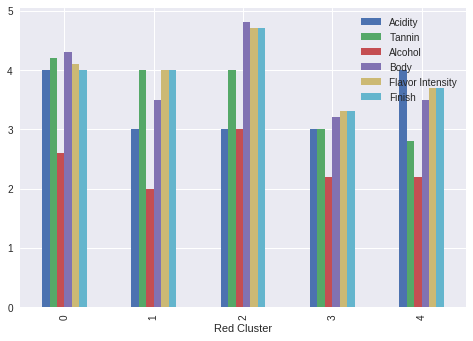

In [21]:
red_cluster_means.plot(kind = 'bar')

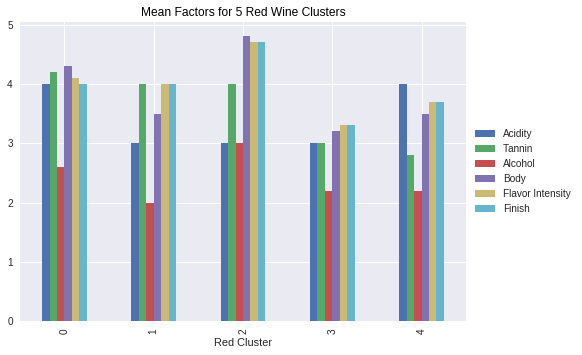

In [22]:
import matplotlib.pyplot as plt

f = plt.figure()

plt.title('Mean Factors for 5 Red Wine Clusters', color='black')
red_cluster_means.plot(kind='bar', ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import cross_validation
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier

/opt/conda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [24]:
y = wines['My Rating']

nFolds = 3
n_estimators = range(1,20)
param_grid    = dict(n_estimators = n_estimators)
cv            = cross_validation.StratifiedKFold(y,nFolds)
grid = GridSearchCV(GradientBoostingRegressor(),param_grid=param_grid,cv=cv,verbose=10)

In [25]:
grid.fit(wines[['Sweetness', 'Acidity', 'Alcohol', 'Body', 'Flavor Intensity', 'Finish', 'Floral', 'Green Fruit', 'Citrus Fruit', 'Stone Fruit', 'Tropical Fruit', 'Red Fruit', 'Black Fruit', 'Dried/cooked fruit', 'Herbaceous', 'Herbal', 'Pungent spice', 'Other', 'Yeast/lees', 'MLF', 'Oak', 'Developing notes']],y)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 19 candidates, totalling 57 fits
[CV] n_estimators=1 ..................................................
[CV] ................... n_estimators=1, score=0.027792, total=   0.0s
[CV] n_estimators=1 ..................................................
[CV] ................... n_estimators=1, score=0.071135, total=   0.0s
[CV] n_estimators=1 ..................................................
[CV] .................. n_estimators=1, score=-0.003124, total=   0.0s
[CV] n_estimators=2 ..................................................
[CV] ................... n_estimators=2, score=0.054714, total=   0.0s
[CV] n_estimators=2 ..................................................
[CV] ................... n_estimators=2, score=0.108061, total=   0.0s
[CV] n_estimators=2 ..................................................
[CV] .................. n_estimators=2, score=-0.003124, total=   0.0s
[CV] n_estimators=3 ..................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    0.6s finished


GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[4 2 ..., 3 4], n_folds=3, shuffle=False, random_state=None),
       error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=10)

In [26]:
print("Best parameters set found on development set:")
print()
print(grid.best_params_)
print()
print("Grid scores on development set:")
print()
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
print()

Best parameters set found on development set:
()
{'n_estimators': 5}
()
Grid scores on development set:
()
0.033 (+/-0.060) for {'n_estimators': 1}
0.055 (+/-0.089) for {'n_estimators': 2}
0.079 (+/-0.163) for {'n_estimators': 3}
0.096 (+/-0.207) for {'n_estimators': 4}
0.104 (+/-0.250) for {'n_estimators': 5}
0.098 (+/-0.287) for {'n_estimators': 6}
0.098 (+/-0.324) for {'n_estimators': 7}
0.091 (+/-0.341) for {'n_estimators': 8}
0.081 (+/-0.378) for {'n_estimators': 9}
0.072 (+/-0.413) for {'n_estimators': 10}
0.067 (+/-0.435) for {'n_estimators': 11}
0.073 (+/-0.431) for {'n_estimators': 12}
0.063 (+/-0.443) for {'n_estimators': 13}
0.069 (+/-0.445) for {'n_estimators': 14}
0.069 (+/-0.452) for {'n_estimators': 15}
0.062 (+/-0.473) for {'n_estimators': 16}
0.060 (+/-0.476) for {'n_estimators': 17}
0.051 (+/-0.431) for {'n_estimators': 18}
0.041 (+/-0.449) for {'n_estimators': 19}
()


In [27]:
attribute_est = Pipeline([
    ('gbr',GradientBoostingRegressor(n_estimators = 7,random_state = 124))
    ])

attribute_est.fit(wines[['Sweetness', 'Acidity', 'Tannin', 'Alcohol', 'Body', 'Flavor Intensity', 'Finish', 'Floral', 'Green Fruit', 'Citrus Fruit', 'Stone Fruit', 'Tropical Fruit', 'Red Fruit', 'Black Fruit', 'Dried/cooked fruit', 'Herbaceous', 'Herbal', 'Pungent spice', 'Other', 'Yeast/lees', 'MLF', 'Oak', 'Developing notes']],y)

Pipeline(steps=[('gbr', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=7, presort='auto',
             random_state=124, subsample=1.0, verbose=0, warm_start=False))])

In [28]:
wines['Gradient Boost'] = attribute_est.predict(wines[['Sweetness', 'Acidity', 'Tannin', 'Alcohol', 'Body', 'Flavor Intensity', 'Finish', 'Floral', 'Green Fruit', 'Citrus Fruit', 'Stone Fruit', 'Tropical Fruit', 'Red Fruit', 'Black Fruit', 'Dried/cooked fruit', 'Herbaceous', 'Herbal', 'Pungent spice', 'Other', 'Yeast/lees', 'MLF', 'Oak', 'Developing notes']])

In [29]:
wines

,Year,Country,Region,PDO,Varietal,Type of wine,Still or Sparkling,Intensity Color,Color,Intensity Nose,...,Other,Yeast/lees,MLF,Oak,Developing notes,Color.number,My Rating,"White, Rose, Red","Still, Sparkling, Fortified",Gradient Boost
0,2015,France,Loire,Muscadet Sevre et Maine Sur Lie,Melon de Bourgogne,White,Still,2,Gold,3,...,0,0,0,0,0,3,4,1,1,3.204935
1,2015,USA,New York,Finger Lakes,Riesling,White,Still,2,Lemon,4,...,0,0,0,0,0,2,2,1,1,2.444892
2,2013,USA,California,Sonoma Coast,Chardonnay,White,Still,2,Gold,5,...,0,0,1,1,0,3,1,1,1,2.071246
3,2013,Italy,Tuscany,Toscana IGT,"Sangiovese, Merlot, Cabernet Sauvignon",Red,Still,3,Ruby,3,...,0,0,0,0,0,9,3,3,1,2.986566
4,2004,Spain,Rioja,Rioja Gran Reserva DOCa,Tempranillo,Red,Still,3,Garnet,4,...,0,0,0,1,1,10,3,3,1,3.204935
5,NV,Spain,Jerez,Jerez,Pedro Ximenez,White,Fortified,3,Brown,5,...,0,0,0,1,1,5,1,1,3,1.926447
6,2015,Italy,Alto Adige,Alto Adige DOC,Pinot Grigio,White,Still,1,Lemon,3,...,0,0,0,0,0,2,4,1,1,3.204935
7,2013,France,Alsace,Alsace,Pinot Gris,White,Still,2,Gold,4,...,0,0,0,0,0,3,4,1,1,3.204935
8,2015,France,Loire,Sancerre,Sauvignon Blanc,White,Still,2,Gold,4,...,0,0,0,0,0,3,4,1,1,3.204935
9,2015,New Zealand,Marlborough,Marlborough,Sauvignon Blanc,White,Still,1,Lemon,4,...,0,0,0,0,0,2,4,1,1,3.204935


In [30]:
import math
def metrics(test):
    round_count = 0
    roundup_count = 0
    rounddown_count = 0
    count = test.count()
    for i in xrange(test.count()):
        if i in wines.index.get_values():
            real = float(wines['My Rating'][i])
            pred = float(test[i])
            if round(pred) - real == 0:
                round_count +=1
            if math.ceil(pred) - real == 0:
                roundup_count +=1
    return "Percent correct: " + str((round((float(round_count)/float(count))*100,0)))+"%"

In [31]:
metrics(wines['Gradient Boost'])

'Percent correct: 46.0%'

In [32]:
sub = ['White, Rose, Red','Still, Sparkling, Fortified','Sweetness', 'Acidity', 'Tannin', 'Alcohol', 'Body', 'Flavor Intensity', 'Finish', 'Floral', 'Green Fruit', 'Citrus Fruit', 'Stone Fruit', 'Tropical Fruit', 'Red Fruit', 'Black Fruit', 'Dried/cooked fruit', 'Herbaceous', 'Herbal', 'Pungent spice', 'Other', 'Yeast/lees', 'MLF', 'Oak', 'Developing notes']

In [33]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
y = wines['My Rating']

nFolds = 3
max_depth = range(1,11)
param_grid    = dict(max_depth = max_depth)
cv            = cross_validation.StratifiedKFold(y,nFolds)
grid = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid,cv=cv,verbose=10)

In [34]:
grid.fit(wines[sub],y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] max_depth=1 .....................................................
[CV] ...................... max_depth=1, score=0.094398, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................... max_depth=1, score=0.281305, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ..................... max_depth=1, score=-0.281935, total=   0.0s
[CV] max_depth=2 .....................................................
[CV] ...................... max_depth=2, score=0.100894, total=   0.0s
[CV] max_depth=2 .....................................................
[CV] ...................... max_depth=2, score=0.448256, total=   0.0s
[CV] max_depth=2 .....................................................
[CV] ..................... max_depth=2, score=-0.372211, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished


GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[4 2 ..., 3 4], n_folds=3, shuffle=False, random_state=None),
       error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=10)

In [35]:
print("Best parameters set found on development set:")
print()
print(grid.best_params_)
print()
print("Grid scores on development set:")
print()
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
print()

Best parameters set found on development set:
()
{'max_depth': 4}
()
Grid scores on development set:
()
0.040 (+/-0.458) for {'max_depth': 1}
0.070 (+/-0.659) for {'max_depth': 2}
0.077 (+/-0.566) for {'max_depth': 3}
0.096 (+/-0.448) for {'max_depth': 4}
-0.111 (+/-0.528) for {'max_depth': 5}
-0.120 (+/-0.553) for {'max_depth': 6}
-0.336 (+/-0.500) for {'max_depth': 7}
-0.185 (+/-0.729) for {'max_depth': 8}
-0.156 (+/-0.740) for {'max_depth': 9}
-0.271 (+/-0.809) for {'max_depth': 10}
()


In [36]:
from sklearn import tree
dt = DecisionTreeRegressor(max_depth = 3,random_state = 652)
dt = dt.fit(wines[sub],y)
tree.export_graphviz(dt, out_file='tree.dot',feature_names = sub)    

In [37]:
wines['Decision Tree'] = dt.predict(wines[sub])

In [38]:
metrics(wines['Decision Tree'])

'Percent correct: 55.0%'

In [39]:
wines

,Year,Country,Region,PDO,Varietal,Type of wine,Still or Sparkling,Intensity Color,Color,Intensity Nose,...,Yeast/lees,MLF,Oak,Developing notes,Color.number,My Rating,"White, Rose, Red","Still, Sparkling, Fortified",Gradient Boost,Decision Tree
0,2015,France,Loire,Muscadet Sevre et Maine Sur Lie,Melon de Bourgogne,White,Still,2,Gold,3,...,0,0,0,0,3,4,1,1,3.204935,3.257143
1,2015,USA,New York,Finger Lakes,Riesling,White,Still,2,Lemon,4,...,0,0,0,0,2,2,1,1,2.444892,2.000000
2,2013,USA,California,Sonoma Coast,Chardonnay,White,Still,2,Gold,5,...,0,1,1,0,3,1,1,1,2.071246,1.000000
3,2013,Italy,Tuscany,Toscana IGT,"Sangiovese, Merlot, Cabernet Sauvignon",Red,Still,3,Ruby,3,...,0,0,0,0,9,3,3,1,2.986566,3.257143
4,2004,Spain,Rioja,Rioja Gran Reserva DOCa,Tempranillo,Red,Still,3,Garnet,4,...,0,0,1,1,10,3,3,1,3.204935,3.257143
5,NV,Spain,Jerez,Jerez,Pedro Ximenez,White,Fortified,3,Brown,5,...,0,0,1,1,5,1,1,3,1.926447,1.000000
6,2015,Italy,Alto Adige,Alto Adige DOC,Pinot Grigio,White,Still,1,Lemon,3,...,0,0,0,0,2,4,1,1,3.204935,3.257143
7,2013,France,Alsace,Alsace,Pinot Gris,White,Still,2,Gold,4,...,0,0,0,0,3,4,1,1,3.204935,3.257143
8,2015,France,Loire,Sancerre,Sauvignon Blanc,White,Still,2,Gold,4,...,0,0,0,0,3,4,1,1,3.204935,3.257143
9,2015,New Zealand,Marlborough,Marlborough,Sauvignon Blanc,White,Still,1,Lemon,4,...,0,0,0,0,2,4,1,1,3.204935,3.257143


In [40]:
sub2 = ['White, Rose, Red','Still, Sparkling, Fortified','Sweetness', 'Acidity', 'Tannin', 'Alcohol', 'Oak', 'Developing notes']

In [41]:

from IPython.display import Image 
dt = DecisionTreeRegressor(max_depth = 5,random_state = 652,min_samples_leaf=5)
dt = dt.fit(wines[sub2],y)
dot_data = tree.export_graphviz(dt, out_file='tree.dot',feature_names = sub2)    

In [42]:
wines['Decision Tree'] = dt.predict(wines[sub2])

In [43]:
metrics(wines['Decision Tree'])

'Percent correct: 64.0%'

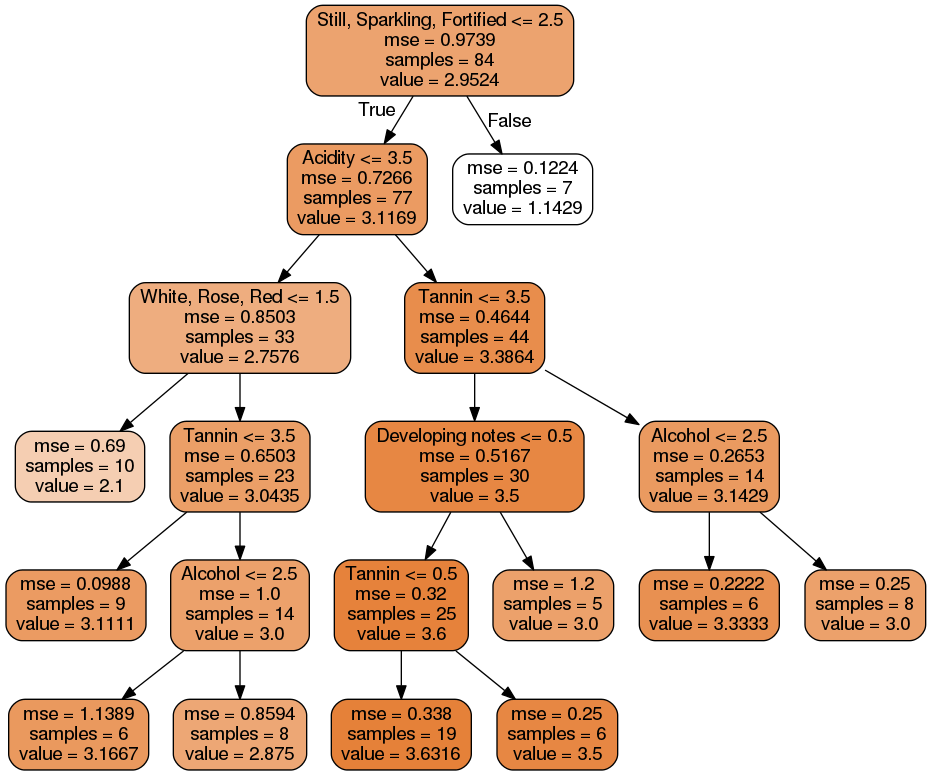

In [44]:
import pydotplus
from IPython.display import Image  
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=sub2,  filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  


In [51]:
interact(update_type,Type_of_Wine =['-','Red','White']) 

<function __main__.update_type>